# Weekly project part 1
    Using the image "appletree.jpg"
    A) Can you segment the apples from the tree?
    B) Can you get the computer to count how many there are? 
        How close can you get there are 26.
    C) Can you change color of one of them?
    D) Can you segment the leaves?

In [167]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
!pip install imutils
import imutils

In [168]:
bgr_img = cv2.imread("appletree.jpg")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=1600, height=1200, depth=3


22


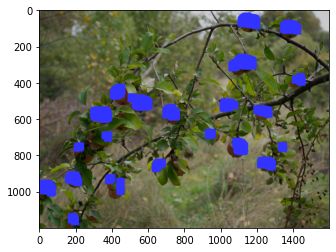

In [199]:
bgr_img = cv2.imread("appletree.jpg")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])

hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lower = np.array([150,100,20])
upper = np.array([190,255,255])
apple_mask = cv2.inRange(hsv_img, lower, upper) 
apple_mask = cv2.erode(apple_mask, None, iterations = 3)
apple_mask = cv2.dilate(apple_mask, None, iterations = 20)

cnts = cv2.findContours(apple_mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))

green_apple = image.copy()
green_apple_mask = cv2.cvtColor(apple_mask, cv2.COLOR_GRAY2RGB)
green_apple[(green_apple_mask==255).all(-1)] = [0,0,255]
green_apple = cv2.addWeighted(green_apple_mask, 0.2, green_apple, 0.8, 0, green_apple_mask)

plt.imshow(green_apple)


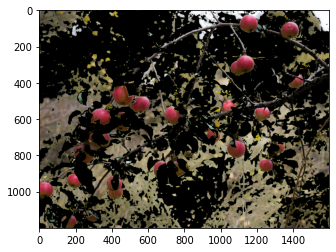

In [170]:
bgr_img = cv2.imread("appletree.jpg")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, (30, 0, 0), (60, 255, 255))
mask = cv2.bitwise_not(mask)
image = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(image)

# Weekly project part 2
    A) Remove the greenscreen and replace the background in "itssp.png"?
    B) Can improve the edge with erroding/dialating?

width=1280, height=720, depth=3


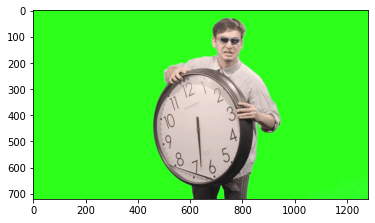

In [171]:
bgr_img = cv2.imread("ittsp.png")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
plt.imshow(image)

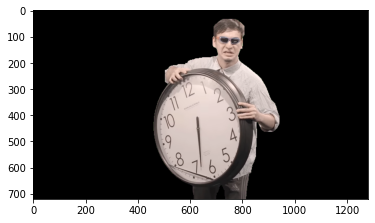

In [172]:
# background = cv2.inRange(image, (0, 0, 0), (80, 255, 80))
hsv_bg = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hsv_bg = cv2.inRange(hsv_bg, (50, 0, 0), (60, 255, 255))
mask = cv2.bitwise_not(hsv_bg)
mask = cv2.erode(mask, None, iterations = 15)
mask = cv2.dilate(mask, None, iterations = 15)
image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(image, cmap='gray')